# Amazon Reviews Analysis
---
<b>By David Penny<b>

<b>Problem Statement:<b>
- With amazon nearing ½ billion products, users turn to reviews to inform their purchase decisions. The question is how helpful is each review?


<b>Understanding the Problem<b>
- Yelp has an algorithm that classifies reviews as “recommended” or “not-recommended” and is very effective at maintaining an honest review of each establishment.
- Amazon removes reviews it deems unauthentic or that violate its Terms of Use. However many “unhelpful” reviews seem to remain. Sellers can also be maliciously attacked when competitors order blatently obvious reviews for another seller, forcing Amazon to automatically shut the seller down.


<b>What is an Unhelpful Review?<b>

Unhelpful reviews can be any combination of the following:
- Too Short.
- Too Long.
- Too complicated to read.
- Too simplistic.
- Overly negative
- Overly positive
- Containing toxic or otherwise strong negative sentiment.
- Falsified or dishonest.
- Incentivised

<b>Levels of Analysis<b>
    
While there are many avenues to tackle this problem and different levels of analysis possible. This project will only focus on the first level and if more time exists, pursue the second level.
    
Level 1: Feature Engineering
- Engineer features seen in Table 1 below. Train and test a variety of models to attempt to reach the highest accuracy.
    
Level 2: User Behavior & Product Trust
- www.ReviewMeta.com does this exceptionally well. They scrape each product, its reviews and the metadata from each of the users profile pages, and then determine the following:
    
    - Check for deleted reviews  (Has the product lost reviews over time?)
    - Reviewer ease (Does the reviewer always give '5-star' reviews?)
    - Rating trend (How has the review rating changed over time?)
    - Unverified purchases (Is the customer verified for purchasing the product?)
    - Word count comparison (How do the word counts compare review to review?)
    - Phrase repetition (Are the reviews similar in any way?)
    - Suspicious reviewers (one-hit wonders, never-verified reviewers, single-day reviewers)
    - Overlapping review history (Has the same customer reviewed the same product?)
    - Brand repeats (Do the same customers review all the same products?)
    
This creates a exceptionally powerful understanding of not just the trustworthiness of the review, but the trustworthiness of the reviewer.

<b>Goal<b>

- Engineer the correct features in the correct combination to attain the highest possible accuracy at labeling reviews as 'falsified'.

<b>Packages, programs and libraries Required<b>
- Sklearn
- textstat
- [Stanford CoreNLP](https://stanfordnlp.github.io/CoreNLP/index.html)
- Java's JDK

<b>Ackowledgements<b>
- Dataset sourced from github repository: [Deception-Detection-on-Amazon-reviews-dataset](https://github.com/aayush210789/Deception-Detection-on-Amazon-reviews-dataset)
- Yao, Yao; Angelov, Ivelin; Rasmus-Vorrath, Jack; Lee, Mooyoung; and Engels, Daniel W. (2018) "Yelp’s Review Filtering Algorithm,"
SMU Data Science Review: Vol. 1 : No. 3 , Article 3.
Available at: https://scholar.smu.edu/datasciencereview/vol1/iss3/3
- Hossain, Md Forhad, "Fake Review Detection using Data Mining" (2019). MSU Graduate Theses. 3423.
https://bearworks.missouristate.edu/theses/3423

<b>Feature Engineering:<b>

Features to Add | Description | Example
------------- | ------------- | -------------
falsified | The label indicating if the review was falsified or not | 1
rating | The star rating the customer rated the product from 1-5 | 3
verified_purchase | Returns wether or not the customer purchased the product. | 1
sentiment | Returns the overall sentiment of the review. | 0
num_words_in_text | Returns the total number of words in the text | 23
num_stopwords| Returns the total number of stop words. | 12
num_words_in_text_no_stop | Returns the total number of words in the text not counting stop words. | 9
num_unique_words | Returns the number of unique words in the text. | 17
mean_word_len| Returns the average word length in the text. | 4
num_chars| Returns the total number of characters. | 251
num_punctuations| Returns the total number of punctuations. | 4
num_scentences_in_text | Returns the total number of scenctences in the text using textstat library. | 5
flesch_ease| Returns the Flesch Reading Ease Score. | 98.11
flesch_kincaid_grade | Returns the Flesch-Kincaid Grade of the given text. This is a grade formula in that a score of 9.3 means that a ninth grader would be able to read the document. | 9.3
automated_readability_index | Returns the ARI (Automated Readability Index) which outputs a number that approximates the grade level needed to comprehend the text. | 6.5
overall_readability_index| Based upon all the above tests, returns the estimated school grade level required to understand the text. | 8.0
total_sentiment | TBD | TBD
toxic_comment_count | TBD | TBD

<b><center>Table 1: Enginered Features from review_text Column</center><b>

#### Personal Notes

Boost Accuracy By:
- Creating feature total_sentiment_analysis by analyzing the sentiment contained in each scentence - NLP on each scentence and using recurrent neural tensor networks (RNTNs) to determine each scentence sentiment.
- Creating feature toxic_comments_count (toxic+severe_toxic+obscene+threat+insult+identity_hate) - Kaggle Challenge
- <mark>Word embeddings <mark>

Consider:
- Scaling data
- KNN, Decision Trees, Support Vector Machines
- PCA
- Model Evaluation
- HyperParameter Optimization for each
- K-Means, GMM, t-SNE clustering
- Neural Networks - recurrent neural tensor networks (RNTNs)
   

### 1. Data Ingest, Check and Cleanup

 
---

In [1]:
# Let's start by importing our (very) favorite libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textstat

In [ ]:
# Read in the data.
df = pd.read_csv('data/labeled_amazon_reviews.txt', sep="\t")
df.columns = ["doc_id", "falsified", "rating", "verified_purchase", "product_category", "product_id", "product_title","review_title","review_text"]

In [ ]:
# Let's take a peek at the data
# '__label1__' indicates a falsified review
# '__label2__' indicates a honest review
df.head(5)

In [ ]:
# Let's explore a few of the full length reviews to understand their content.
# pd.set_option('display.max_colwidth', None)
# Looks good! Let's reset the setting
# pd.set_option('display.max_colwidth', 70)
display(df['review_text'][0:2])

In [ ]:
# How big is our dataset?
df.shape

In [ ]:
# What are the data types of our variables?
df.info()

In [ ]:
# We may preform a few checks later on, so lets make a function.
def display_NA_counts(the_df):
    null_series = the_df.isna().sum(axis=0)
    display(null_series[null_series > 0])

In [ ]:
# Check for NA's
display_NA_counts(df)

In [ ]:
#Check for duplicated rows
df.duplicated().sum()*100.0/df.shape[0]

In [ ]:
# Lets convert our verified_purchase column to binary values.
def get_verified_value(value):
    if value == 'Y':
        return 1
    else:
        return 0

In [ ]:
df['verified_purchase'] = df['verified_purchase'].apply(get_verified_value)

In [ ]:
df.head(2)

In [ ]:
# Lets convert our falsified column to binary values.
def get_label(value):
    if value == '__label1__':
        return 1
    else:
        return 0

In [ ]:
df['falsified'] = df['falsified'].apply(get_label)

In [ ]:
df.head(2)

In [ ]:
# Lets convert our rating column to binary values.
def get_sentiment(value):
    if value > 3:
        return 1
    else:
        return 0

In [ ]:
df['sentiment'] = df['rating'].apply(get_sentiment)

In [139]:
df.head()

,X,actual
5874,nan,nan
11005,nan,nan
6148,nan,nan
16995,nan,nan
7402,nan,nan


Lets try to remove values that don't help us in determining the sentiment. Since '3' is very middle of the road, we can see what happens to our data if we remove it.

In [ ]:
# # Let's remove those who are on the fence with their review
# # Removing ratings with rating = 3 ("On the fence")
# df = df.loc[:, ['review_body', 'star_rating']]
# df = df.query('star_rating != 3.0')
# df.head()

### 2. Preliminary EDA
---

In [ ]:
# What is the distribution of our ratings column?
sns.countplot(x='rating', data=df)
plt.title('Rating Class Imbalance', size=15)
print(df['rating'].value_counts())

In [ ]:
# What is the distribution of our sentiment column?

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Class Imbalance', size=15)
print(df['sentiment'].value_counts())

We have quite a large class imbalance. We'll need to fix this later!

In [ ]:
# What is the distribution of our falsified column?
sns.countplot(x='falsified', data=df)
plt.title('Falsified Class Balance', size=15)
print(df['falsified'].value_counts())

<b>WordCloud<b>

Another check we can preform is a wordcloud. This is helpful not only to see what are some of the most frequent words in the review_text column but we can also see if any html has remained from previous scraping.

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=150, figure_size=(25.0,25.0), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color='gray',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 50,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df['review_text'], title="Word Cloud of Amazon Reviews")

In [ ]:
# Let's clean out any html (should it exist)
import bs4
df['review_text'] = df['review_text'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text())

### 3. Feature Extraction
---

Here we will begin to expand our review_text column into a few more features used later in analysis. We will be primarily be preforming basic math calculations but will utilize the textstat library along with Stanford CoreNLP package to perform some heavy lifting.

In [ ]:
import string

## Number of words in the text ##
df["num_words_in_text"] = df["review_text"].apply(lambda x: len(str(x).split()))

## Number of stopwords in the text ##
df["num_stopwords"] = df["review_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of words in the text (not counting stopwords) ##
df["num_words_in_text_no_stop"] = df.apply(lambda x: x['num_words_in_text'] - x['num_stopwords'], axis=1)

## Number of unique words in the text ##
df["num_unique_words"] = df["review_text"].apply(lambda x: len(set(str(x).split())))

## Average length of the words in the text ##
df["mean_word_len"] = df["review_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

## Number of characters in the text ##
df["num_chars"] = df["review_text"].apply(lambda x: len(str(x)))

## Number of punctuations in the text ##
df["num_punctuations"] = df['review_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [ ]:
## Number of Scentences ##
df["num_scentences_in_text"] = df["review_text"].apply(lambda x: textstat.sentence_count(x))

## Flesch Reading Ease Formula ##
df["flesch_ease"] = df["review_text"].apply(lambda x: textstat.flesch_reading_ease(x))

## Flesh-Kincaid Grade Level ##
df["flesch_kincaid_grade"] = df["review_text"].apply(lambda x: textstat.flesch_kincaid_grade(x))

## Automated Readability Index ##
df["automated_readability_index"] = df["review_text"].apply(lambda x: textstat.automated_readability_index(x))

## Overall Readability Index ##
df["overall_readability_index"] = df["review_text"].apply(lambda x: textstat.text_standard(x, float_output=True))

In [ ]:
# Sanity Check, let's see if everything looks as it should.
df.head(1)

In [ ]:
#Let's see how our data looks and if there are any extremes in our data.
df.describe().transpose()

- We can see that we have some extremly large reviews, let's truncate some of the reviews.

In [257]:
# Truncate some extreme values for better visuals, think about balancing positive vs negative reviews.
# 400 words is about 4 paragraphs. By 4 Paragraphs we should have the idea across.
df_final = df.query('num_words_in_text <= 500 and num_punctuations < 100')

UndefinedVariableError: name 'num_punctuations' is not defined

In [ ]:
#Sanity check. Let's make sure we've made a difference.
df_final.describe().transpose()

<b>Total Sentence Sentiment and Stanford NLP<b>

---

Next up, we'll be utilizing Stanford CoreNLP to preform per sentence sentiment and then calculate the weighted sum of the sentiment. The system is 87.6% accurate at predicting the sentiment of a scentence.

Total sentiment is important as it captures weather or not the review contains a mixed sentiment or if the review is overly negative (or overly positive). Since every scentence in each review is given a sentiment score, the total sentiment is calculated as a weighted sum. 

$$Total Sentiment = 1∗(𝑉𝑒𝑟𝑦 𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒) + 2 ∗ (𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒) + 3 ∗ (𝑁𝑒𝑢𝑡𝑟𝑎𝑙) + 4 ∗ (𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒) + 5 ∗ (𝑉𝑒𝑟𝑦 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒)$$

In [ ]:
from pycorenlp import StanfordCoreNLP

# Reinitialize our count variable to keep track of our progress
i = 0

In [ ]:
def total_sentiment(text):
    global i
    
    n1=0
    n2=0
    n3=0
    n4=0
    n5=0

    nlp = StanfordCoreNLP('http://localhost:9000')

    results = nlp.annotate(text,properties={
            'annotators':'sentiment, ner, pos',
            'outputFormat': 'json',
            'timeout': 50000,
            })

    for s in results["sentences"]:
        if(s["sentiment"] == 'Very Negative'):
            n1+=1
        elif(s["sentiment"] == 'Negative'):
            n2+=1
        elif(s["sentiment"] == 'Neutral'):
            n3+=1
        elif(s["sentiment"] == 'Positive'):
            n4+=1
        else:
            n5+=1

        total_sentiment = 1*n1 + 2*n2 + 3*n3 + 4*n4 + 5*n5

#         print(s["sentiment"])

    i = i +1
    print(f'Finished the {i} total_sentiment with value {total_sentiment}...', end='\r')
    
    return(total_sentiment)



In [ ]:
# If Standord CoreNLP runs into a problem for a particular row, keep going with the next row
# We don't want the program to exit, instead, leave it empty and we can address or drop it later
def get_sentence_catch(x):
    try:
        return(total_sentiment(x))
    except: 
        pass

In [ ]:
# Let's split our dataframe up into smaller chunks to prevent CoreNLP from running out of memory
df1 = df_final[['doc_id', 'review_text']][:5000]
df2 = df_final[['doc_id', 'review_text']][5001:10000]
df3 = df_final[['doc_id', 'review_text']][10001:15000]
df4 = df_final[['doc_id', 'review_text']][15001:20862]

<b>Perform the operation:<b>
    
Here's where we perform the operations. 
    
For each row, we first we call the get_scentence_catch function, which then calls the total_sentiment function. This process ensures that CoreNLP continues to run through all 5000 reviews before exiting if it encounters an error. Some reviews contain information that CoreNLP stuggles to process.
    
Each 5000 chunk takes about 1 hour on my machine. To safeguard against unknown issues, each time we finish one chunk, we save to a csv to backup our progress.

<b>Chunk 1:<b>

In [ ]:
## Determine the total sentiment of the review, by analyzing each scentence. ##
df1["total_sentiment"] = df1["review_text"].apply(lambda x: get_sentence_catch(x))

In [ ]:
df1.to_csv('df1.csv');

In [ ]:
display_NA_counts(df1)

In [ ]:
test_df = pd.merge(df_final[:5000], df1, how='inner', on=['doc_id', 'doc_id']).drop(columns='review_text_y')

In [ ]:
test_df_5000.to_csv('test_df_5000.csv');

<b> Chunk 2:<b>

In [ ]:
## Determine the total sentiment of the review, by analyzing each scentence. ##
df2["total_sentiment"] = df2["review_text"].apply(lambda x: get_sentence_catch(x))

In [ ]:
df2.to_csv('df2.csv');

In [ ]:
display_NA_counts(df2)

<b> Chunk 3:<b>

In [ ]:
## Determine the total sentiment of the review, by analyzing each scentence. ##
df3["total_sentiment"] = df3["review_text"].apply(lambda x: get_sentence_catch(x))

In [ ]:
df3.to_csv('df3.csv');

In [ ]:
display_NA_counts(df3)

<b> Chunk 4:<b>

In [ ]:
## Determine the total sentiment of the review, by analyzing each scentence. ##
df4["total_sentiment"] = df4["review_text"].apply(lambda x: get_sentence_catch(x))

In [ ]:
df4.to_csv('df4.csv');

In [ ]:
display_NA_counts(df4)

<b>Grouping and Cleaning<b>

In [ ]:
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
df3 = pd.read_csv('df3.csv')
df4 = pd.read_csv('df4.csv')

In [ ]:
# Let's group up our dfs
df_grouped = df1.append([df2, df3, df4])

In [ ]:
df_grouped.shape

In [ ]:
# Lets merge the resulting df with the original df
df_merged = pd.merge(df_final, df_grouped, how='inner', on=['doc_id', 'doc_id']).drop(columns='review_text_y')

In [ ]:
df_merged.head()

In [ ]:
# How many NA's total do we have?
display_NA_counts(df_merged)

In [ ]:
# Since we only have a few NA's, let's just drop them.
df_merged.dropna(inplace=True)

In [ ]:
# How many NA's total do we have?
display_NA_counts(df_merged)

In [ ]:
#Check for duplicated rows
df_merged.duplicated().sum()*100.0/df_merged.shape[0]

<b> average_review_sentiment <b>
    
Now that we have total_sentiment calculated, let's add the final feature which is:
    
$$(total sentiment)/(num scentences in text)$$

In [ ]:
## Number of words in the text (not counting stopwords) ##
df_merged["average_review_sentiment"] = df_merged.apply(lambda x: x['total_sentiment']/x['num_scentences_in_text'], axis=1)

In [ ]:
df_merged.head(1)

In [ ]:
df_final = df_merged

In [ ]:
df_final.shape

In [ ]:
df_final.to_csv('df_final.csv', index = False);

### 4. Corrolation Check and VIF Check

In [258]:
df_final = pd.read_csv('df_final.csv')

In [267]:
# Truncate some extreme values for better visuals, think about balancing positive vs negative reviews.
# 400 words is about 4 paragraphs. By 4 Paragraphs we should have the idea across.
df_final = df_final.query('num_words_in_text <= 200 and num_punctuations < 50')

In [268]:
df_final.head(1)

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text_x,sentiment,...,mean_word_len,num_chars,num_punctuations,num_scentences_in_text,flesch_ease,flesch_kincaid_grade,automated_readability_index,overall_readability_index,total_sentiment,average_review_sentiment
0,1,1,4,0,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will save the day. Just keep it around just in case you need it for something.",1,...,4.09,116,3,2,102.10,1.90,3.60,5.00,6.00,3.00


In [269]:
df_final.shape

(19989, 24)

- Let's get a baseline to see how a dummy classifier would score.

In [270]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Separate input features and target
y = df_final['falsified']
X = df_final.drop(columns='falsified', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [1]
Test score:  0.5154061624649859


In [271]:
# Let's make a df with only the numerical items of our original df_final
df_numerical = df_final[['falsified','rating','verified_purchase','sentiment','num_words_in_text','num_stopwords',\
                  'num_words_in_text_no_stop', 'num_unique_words', 'mean_word_len','num_chars',\
                  'num_punctuations','num_scentences_in_text', 'flesch_ease', 'flesch_kincaid_grade',\
                  'automated_readability_index','overall_readability_index', 'total_sentiment', 'average_review_sentiment']]

In [272]:
df_numerical.to_csv('df_numerical.csv');

In [273]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19989 entries, 0 to 20829
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   falsified                    19989 non-null  int64  
 1   rating                       19989 non-null  int64  
 2   verified_purchase            19989 non-null  int64  
 3   sentiment                    19989 non-null  int64  
 4   num_words_in_text            19989 non-null  int64  
 5   num_stopwords                19989 non-null  int64  
 6   num_words_in_text_no_stop    19989 non-null  int64  
 7   num_unique_words             19989 non-null  int64  
 8   mean_word_len                19989 non-null  float64
 9   num_chars                    19989 non-null  int64  
 10  num_punctuations             19989 non-null  int64  
 11  num_scentences_in_text       19989 non-null  int64  
 12  flesch_ease                  19989 non-null  float64
 13  flesch_kincaid_g

In [274]:
# Let's save a copy for later
df_numerical.to_csv('df_numerical.csv');

In [275]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif_df_numerical = df_numerical
VIF = []

#Lets take a look at the Varience Inflation Factor on ONLY low corrolated columns
vif_df_numerical = vif_df_numerical.drop('num_words_in_text', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_stopwords', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_words_in_text_no_stop', axis=1)
vif_df_numerical = vif_df_numerical.drop('automated_readability_index', axis=1)
vif_df_numerical = vif_df_numerical.drop('flesch_ease', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_unique_words', axis=1)
vif_df_numerical = vif_df_numerical.drop('mean_word_len', axis=1)
vif_df_numerical = vif_df_numerical.drop('rating', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_chars', axis=1)
#vif_df_numerical = vif_df_numerical.drop('verified_purchase', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_scentences_in_text', axis=1)

for i in vif_df_numerical:
    X = vif_df_numerical[[
        'falsified',
        #'rating',
        'verified_purchase',
        'sentiment',
        #'num_words_in_text',
        #'num_stopwords',
        #'num_words_in_text_no_stop', 
        #'num_unique_words', 
        #'mean_word_len',
        #'num_chars',
        'num_punctuations',
        #'num_scentences_in_text', 
        #'flesch_ease', 
        'flesch_kincaid_grade',
        #'automated_readability_index',
        'overall_readability_index',
        'total_sentiment',
        'average_review_sentiment'
        ]]
    
    low_vif_df_numerical = X
    y = vif_df_numerical['sentiment']
    
    X_withconst = sm.add_constant(X)
    
    #Lets store our results
    VIF = pd.Series([variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])],index=X.columns)
    
    #Lets make a pretty table to show our results
    pd.options.display.float_format = '{:.2f}'.format
    
VIF_Frame = pd.DataFrame(VIF, columns=['VIF Value'])

VIF_Frame

,VIF Value
falsified,2.12
verified_purchase,2.47
sentiment,4.01
num_punctuations,5.83
flesch_kincaid_grade,7.81
overall_readability_index,4.28
total_sentiment,9.33
average_review_sentiment,7.07


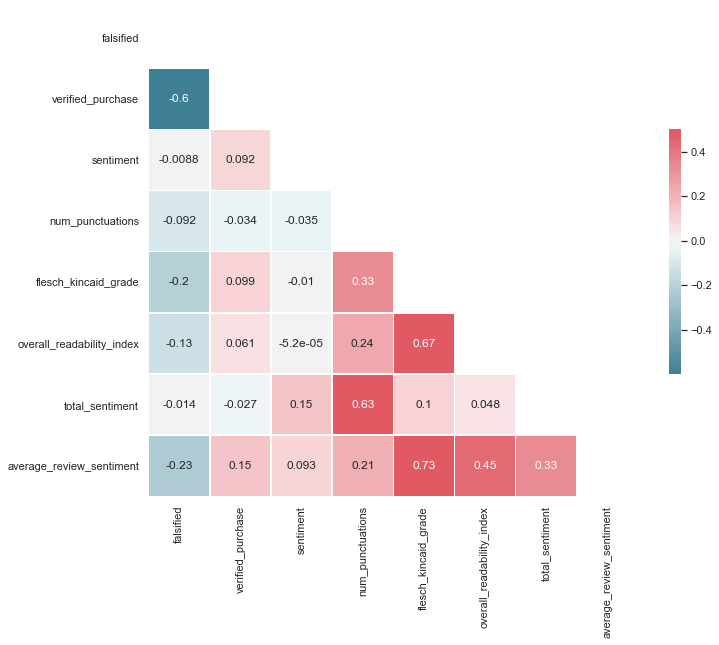

In [276]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df_corr = df_numerical
df_corr = low_vif_df_numerical

sns.set(style="white")

# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=corr)

### 5. Preliminary Modeling

In [277]:
import statsmodels.api as sm

In [278]:
print(low_vif_df_numerical.columns)

Index(['falsified', 'verified_purchase', 'sentiment', 'num_punctuations',
       'flesch_kincaid_grade', 'overall_readability_index', 'total_sentiment',
       'average_review_sentiment'],
      dtype='object')


In [279]:
from sklearn.preprocessing import StandardScaler

#Before Scaling: Pseudo R-squ.:0.3151
#After MinMax Scaling: Pseudo R-squ.:0.3151
#After Standard Scaling: Pseudo R-squ.:0.3151

y = low_vif_df_numerical['falsified']
X = low_vif_df_numerical.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(y.shape)
print(X.shape)

(19989,)
(19989, 7)


In [280]:
X_withconstant = sm.add_constant(X)

my_logit_results = sm.Logit(y, X_withconstant).fit()
my_logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.467707
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              falsified   No. Observations:                19989
Model:                          Logit   Df Residuals:                    19981
Method:                           MLE   Df Model:                            7
Date:                Mon, 22 Jun 2020   Pseudo R-squ.:                  0.3250
Time:                        00:58:49   Log-Likelihood:                -9349.0
converged:                       True   LL-Null:                       -13850.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         2.2518      0.060     37.373      0.000       2.134       2.370
verified_purchase            -2.9762      0.041    -73.441      0.000      -3.056      -2.897
sentiment                     0.3264      0.046      7.059      0.000       0.236       0.417
num_punctuations             -0.0788      0.004    -18.181      0.000      -0.087      -0.070
flesch_kincaid_grade          0.0031      0.004      0.779      0.436      -0.005       0.011
overall_readability_index    -0.0007      0.004     -0.173      0.863      -0.009       0.007
total_sentiment               0.0500      0.004     12.764      0.000       0.042       0.058
average_review_sentiment     -0.1332      0.008    -17.640      0.000      -0.148      -0.118
=============================================================================================
"""

### 6. Class Imbalance + Downsampling DF

1    15437
0     4552
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Sentiment Counts')

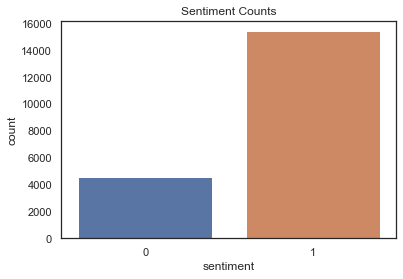

In [281]:
print(low_vif_df_numerical['sentiment'].value_counts())
sns.countplot(x='sentiment', data=low_vif_df_numerical)
plt.title("Sentiment Counts")

In [282]:
1-4817/16183

0.7023419637891615

In [283]:
from sklearn.utils import resample

positive = low_vif_df_numerical[low_vif_df_numerical['sentiment']==1]
negative = low_vif_df_numerical[low_vif_df_numerical['sentiment']==0]

positive_downsampled = resample(positive,
                                replace = False, # sample without replacement
                                n_samples = len(negative), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([positive_downsampled, negative])

df_downsampled = downsampled

1    4552
0    4552
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Sentiment Counts')

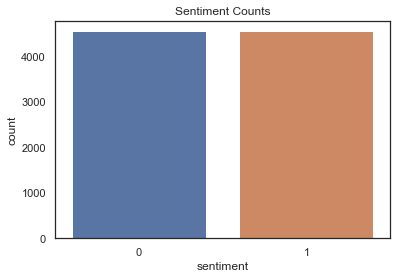

In [284]:
print(df_downsampled['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df_downsampled)
plt.title("Sentiment Counts")

In [285]:
#As this is our fully formed dataset, let's save a backup copy.
df_downsampled.to_csv('df_downsampled.csv');

### 7. Clustering

In [286]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [287]:
# tSNE with two components
y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified', axis=1)

# y = df_final['falsified']
# X = df_final.drop(columns='falsified', axis=1)

# We need to scale the data since tSNE is also distance based
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

my_tSNE = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

X_tSNE = my_tSNE.fit_transform(X_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9104 samples in 0.006s...
[t-SNE] Computed neighbors for 9104 samples in 0.724s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9104
[t-SNE] Computed conditional probabilities for sample 2000 / 9104
[t-SNE] Computed conditional probabilities for sample 3000 / 9104
[t-SNE] Computed conditional probabilities for sample 4000 / 9104
[t-SNE] Computed conditional probabilities for sample 5000 / 9104
[t-SNE] Computed conditional probabilities for sample 6000 / 9104
[t-SNE] Computed conditional probabilities for sample 7000 / 9104
[t-SNE] Computed conditional probabilities for sample 8000 / 9104
[t-SNE] Computed conditional probabilities for sample 9000 / 9104
[t-SNE] Computed conditional probabilities for sample 9104 / 9104
[t-SNE] Mean sigma: 0.226968
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.496231
[t-SNE] KL divergence after 300 iterations: 2.232075


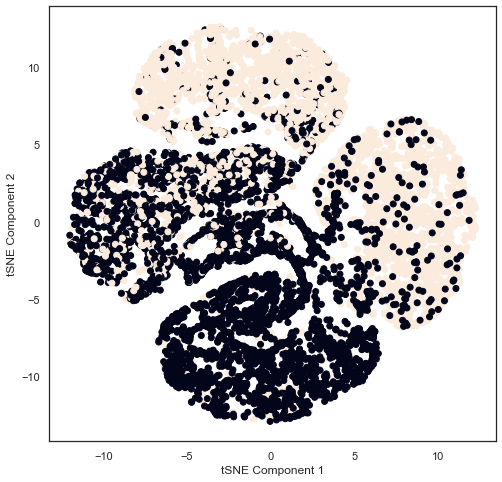

In [288]:
# Plotting the tSNE-transformed data (only the first two dimensions)
plt.figure(figsize=(8, 8))
plt.scatter(X_tSNE[:,0],X_tSNE[:,1],c=y)

plt.xlabel("tSNE Component 1")
plt.ylabel("tSNE Component 2")

plt.show()

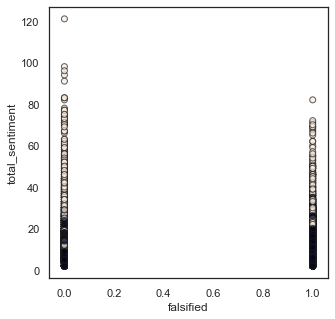

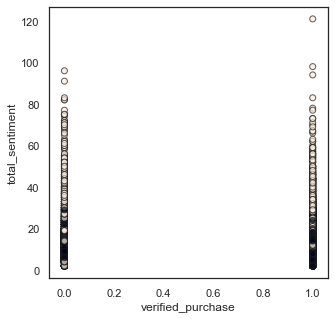

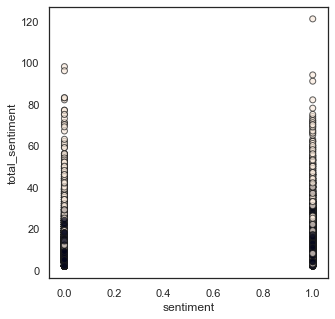

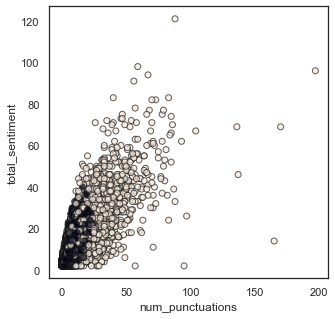

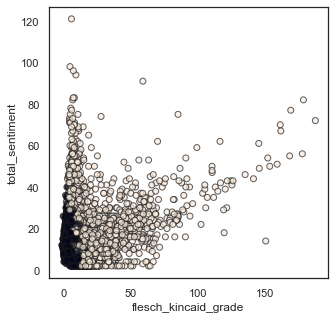

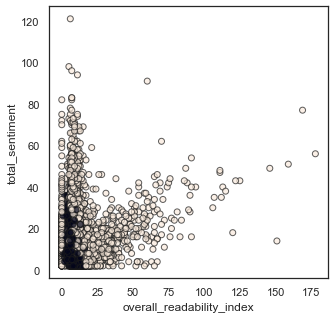

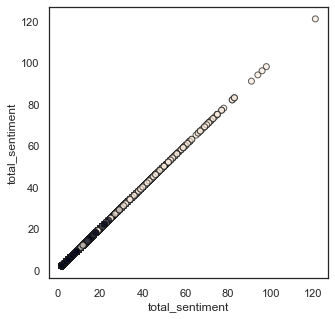

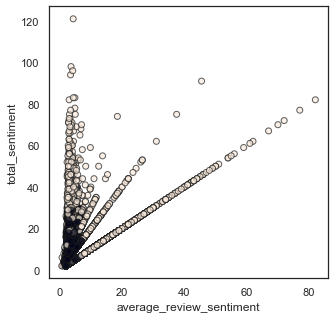

In [51]:
from sklearn.mixture import GaussianMixture

X = df_downsampled
y = df_downsampled['falsified']

#Build and fit the model
my_gmm = GaussianMixture(n_components=2, covariance_type='full')
my_gmm.fit(X)

#Getting the labels
pred_labels_gmm = my_gmm.predict(X)

for column in df_downsampled:
    #Plot the predictions
    plt.figure(figsize=[5,5])
    plt.scatter(x = df_downsampled[column],
                y = df_downsampled['total_sentiment'],
                c=pred_labels_gmm, 
                edgecolor='k',
                alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('total_sentiment')
    plt.show();

### 8. Model Selection & Detailed Data Modeling

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

The order of operation will be:

------------

1. Train-Test Split
2. Pre-process 
    1. Fit scaler on train data
    2. Transform train data
    3. Transform test data using the same scaler
3. Train model on scaled train data
4. Test model on scaled test data

In [289]:
df_numerical = df_numerical.drop(columns=['num_words_in_text','num_stopwords'])
y = df_numerical['falsified']
X = df_numerical.drop(columns='falsified')

# y = df_downsampled['falsified']
# X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(y.shape)
print(X.shape)

(19989,)
(19989, 15)


In [290]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [291]:
my_logreg_model_scaled = LogisticRegression(C=0.01, random_state=1).fit(X_scaled_train, y_train)

In [292]:
print(my_logreg_model_scaled.score(X_scaled_test,y_test))

0.7841420710355178


In [293]:
X_withconstant = sm.add_constant(X)

my_logit_results = sm.Logit(y, X_withconstant).fit()
my_logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.464824
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              falsified   No. Observations:                19989
Model:                          Logit   Df Residuals:                    19973
Method:                           MLE   Df Model:                           15
Date:                Mon, 22 Jun 2020   Pseudo R-squ.:                  0.3291
Time:                        00:59:28   Log-Likelihood:                -9291.4
converged:                       True   LL-Null:                       -13850.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          19.5848      3.021      6.484      0.000      13.664      25.505
rating                          0.1047      0.034      3.098      0.002       0.038       0.171
verified_purchase              -2.9897      0.041    -73.118      0.000      -3.070      -2.910
sentiment                       0.0389      0.103      0.377      0.706      -0.163       0.241
num_words_in_text_no_stop      -0.0494      0.006     -7.708      0.000      -0.062      -0.037
num_unique_words                0.0012      0.005      0.236      0.813      -0.009       0.011
mean_word_len                  -1.7407      0.296     -5.874      0.000      -2.321      -1.160
num_chars                       0.0033      0.001      4.302      0.000       0.002       0.005
num_punctuations               -0.0678      0.006    -11.950      0.000      -0.079      -0.057
num_scentences_in_text         -0.0515      0.031     -1.640      0.101      -0.113       0.010
flesch_ease                    -0.1004      0.018     -5.692      0.000      -0.135      -0.066
flesch_kincaid_grade           -0.7320      0.129     -5.696      0.000      -0.984      -0.480
automated_readability_index     0.3809      0.065      5.882      0.000       0.254       0.508
overall_readability_index       0.0002      0.004      0.045      0.964      -0.008       0.008
total_sentiment                 0.0818      0.009      9.615      0.000       0.065       0.098
average_review_sentiment       -0.1762      0.013    -13.644      0.000      -0.201      -0.151
===============================================================================================
"""

In [294]:
coefficients = my_logit_results.params
coefficients.head()

const                       19.58
rating                       0.10
verified_purchase           -2.99
sentiment                    0.04
num_words_in_text_no_stop   -0.05
dtype: float64

In [295]:
p_values = my_logit_results.pvalues
p_values.head()

const                       0.00
rating                      0.00
verified_purchase           0.00
sentiment                   0.71
num_words_in_text_no_stop   0.00
dtype: float64

In [296]:
coefficient_df = pd.DataFrame({"coefficient": coefficients,
                               "p-value": p_values})
print(coefficient_df.shape)
coefficient_df.head()

(16, 2)


,coefficient,p-value
const,19.58,0.00
rating,0.10,0.00
verified_purchase,-2.99,0.00
sentiment,0.04,0.71
num_words_in_text_no_stop,-0.05,0.00


In [297]:
coefficient_df.drop('const', axis=0, inplace=True)
coefficient_df.head()

,coefficient,p-value
rating,0.10,0.00
verified_purchase,-2.99,0.00
sentiment,0.04,0.71
num_words_in_text_no_stop,-0.05,0.00
num_unique_words,0.00,0.81


In [298]:
statistically_significant_condition = coefficient_df['p-value'] < 0.05

significant_coefficient_df = coefficient_df.loc[statistically_significant_condition].copy()
significant_coefficient_df.shape

(11, 2)

In [299]:
significant_coefficient_df['abs_coef'] = np.abs(significant_coefficient_df['coefficient'])
significant_coefficient_df = significant_coefficient_df.sort_values(by='abs_coef')
significant_coefficient_df

,coefficient,p-value,abs_coef
num_chars,0.00,0.00,0.00
num_words_in_text_no_stop,-0.05,0.00,0.05
num_punctuations,-0.07,0.00,0.07
total_sentiment,0.08,0.00,0.08
flesch_ease,-0.10,0.00,0.10
rating,0.10,0.00,0.10
average_review_sentiment,-0.18,0.00,0.18
automated_readability_index,0.38,0.00,0.38
flesch_kincaid_grade,-0.73,0.00,0.73
mean_word_len,-1.74,0.00,1.74


In [300]:
significant_coefficient_df['color'] = np.where(significant_coefficient_df['coefficient'] >= 0.0,
                                               'blue', 
                                               'red')
significant_coefficient_df.head()

,coefficient,p-value,abs_coef,color
num_chars,0.00,0.00,0.00,blue
num_words_in_text_no_stop,-0.05,0.00,0.05,red
num_punctuations,-0.07,0.00,0.07,red
total_sentiment,0.08,0.00,0.08,blue
flesch_ease,-0.10,0.00,0.10,red


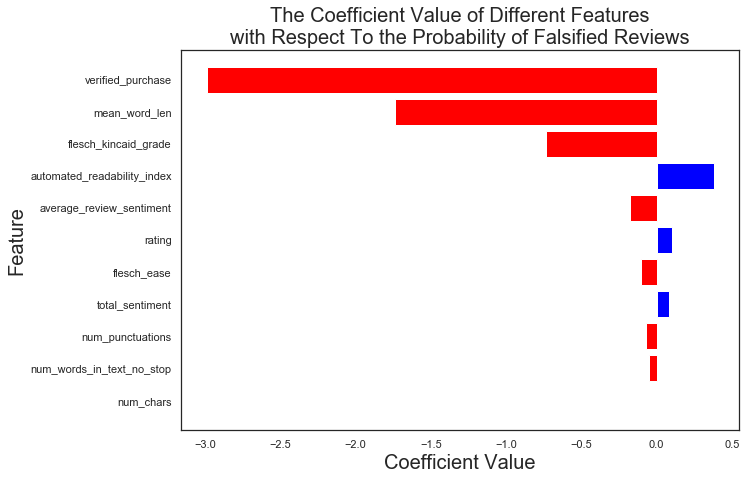

In [301]:
plt.figure(figsize=(10,7))
plt.barh(significant_coefficient_df.index, 
         significant_coefficient_df['coefficient'],
         color=significant_coefficient_df['color'])
plt.title("The Coefficient Value of Different Features\nwith Respect To the Probability of Falsified Reviews",
          size=20)
plt.xlabel("Coefficient Value", size=20)
plt.ylabel("Feature", size=20)
plt.show()

In [302]:
significant_coefficient_df['odds_increase'] = np.where(significant_coefficient_df['coefficient'] > 0,
                                                       np.exp(significant_coefficient_df['coefficient']),
                                                       np.exp(-significant_coefficient_df['coefficient']))
significant_coefficient_df.head() 

,coefficient,p-value,abs_coef,color,odds_increase
num_chars,0.00,0.00,0.00,blue,1.00
num_words_in_text_no_stop,-0.05,0.00,0.05,red,1.05
num_punctuations,-0.07,0.00,0.07,red,1.07
total_sentiment,0.08,0.00,0.08,blue,1.09
flesch_ease,-0.10,0.00,0.10,red,1.11


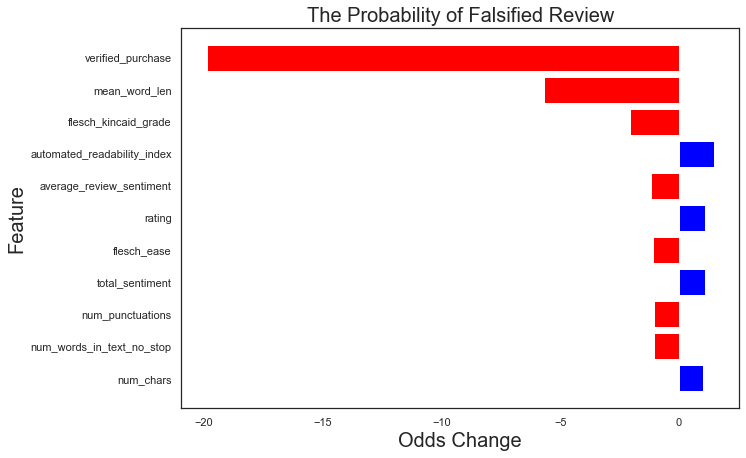

In [303]:
significant_coefficient_df['odds_increase'] = np.where(significant_coefficient_df['coefficient'] > 0,
                                                       significant_coefficient_df['odds_increase'],
                                                       -significant_coefficient_df['odds_increase'])


plt.figure(figsize=(10,7))
plt.barh(significant_coefficient_df.index, 
         significant_coefficient_df['odds_increase'],
         color=significant_coefficient_df['color'])
plt.title("The Probability of Falsified Review",
          size=20)
plt.xlabel("Odds Change", size=20)
plt.ylabel("Feature", size=20)
plt.show()

#### A. Logistic Regression

In [304]:
#Set up X and y
X = df_downsampled.drop('falsified', axis=1)
y = df_downsampled['falsified']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_remainder, X_test, y_remainder, y_test = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, 
                                                            stratify = y,
                                                            random_state=1)

In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Set up X and y
X = df_downsampled.drop('falsified', axis=1)
y = df_downsampled['falsified']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

#Baseline LogReg Model
logreg_model = LogisticRegression( max_iter=10000).fit(X_scaled_train, y_train)

#Score it
print(logreg_model.score(X_scaled_train,y_train))
print(logreg_model.score(X_scaled_test,y_test))

0.8147198828268034
0.8259198242723779


In [306]:
from sklearn.metrics import classification_report

# predict on test set
logreg_pred = logreg_model.predict(X_scaled_test)

report_initial = classification_report(y_test, logreg_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1771
           1       0.87      0.77      0.82      1871

    accuracy                           0.83      3642
   macro avg       0.83      0.83      0.83      3642
weighted avg       0.83      0.83      0.83      3642



- Now that we have a baseline, let's see if we can optimize the hyperparameter C using cross validation.

In [307]:
#Set up X and y
X = df_downsampled.drop('falsified', axis=1)
y = df_downsampled['falsified']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Store the results
validation_scores = []
train_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    logreg_model = LogisticRegression(C = c,random_state=1, max_iter=10000)
    logreg_model.fit(X_scaled_train, y_train)
    
    # train on traning set
    train_scores.append(logreg_model.score(X_scaled_train, y_train))
    # score on validation set
    validation_scores.append(logreg_model.score(X_scaled_test, y_test))
    

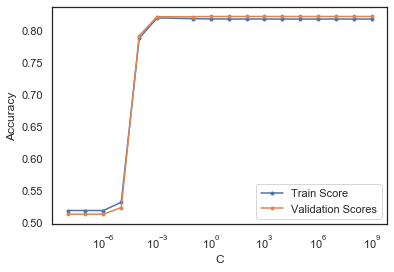

In [308]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [309]:
# Getting our optimal max depth value
C_range[np.argmax(validation_scores)]

1.0

In [310]:
my_final_model = LogisticRegression(C=0.0001,random_state=1,max_iter=1000)

# Remember that X_remainder and y_remainder held the data I split into train and validation
# I can use that data to re-train my model
my_final_model.fit(X_scaled_train,y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### LOG REG RESULTS

In [311]:
print(my_final_model.score(X_scaled_train,y_train))
print(my_final_model.score(X_scaled_test,y_test))

0.7878217200251099
0.7920937042459737


In [312]:
from sklearn.metrics import classification_report

# predict on test set
logreg_pred = my_final_model.predict(X_scaled_test)

report_initial = classification_report(y_test, logreg_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1331
           1       0.80      0.80      0.80      1401

    accuracy                           0.79      2732
   macro avg       0.79      0.79      0.79      2732
weighted avg       0.79      0.79      0.79      2732



In [313]:
from sklearn.metrics import confusion_matrix

confusion_matrix_logreg = confusion_matrix(y_test, logreg_pred)

pd.DataFrame(data=confusion_matrix_logreg,
            index = ["Predicted non-Falsified", "Predicted Falsified"],
            columns = ["True Non-Falsified", "True Falsified"])

,True Non-Falsified,True Falsified
Predicted non-Falsified,1050,281
Predicted Falsified,287,1114


#### B. K-Nearest Neighbors

In [314]:
from sklearn.neighbors import KNeighborsClassifier

# y = df_numerical['falsified']
# X = df_numerical.drop(columns='falsified')

y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
KNN_model.fit(X_train, y_train)

# Score the model on the test set
train_predictions = KNN_model.predict(X_train)
test_predictions = KNN_model.predict(X_test)

train_accuracy = accuracy_score(train_predictions, y_train)
test_accuracy = accuracy_score(test_predictions, y_test)

print(f"Train set accuracy: {train_accuracy}")
print(f"Test set accuracy: {test_accuracy}")

Train set accuracy: 0.9954689001784979
Test set accuracy: 0.6974190005491488


In [315]:
# Define hyperparameters to search over
dt_params = { 'n_neighbors':list(range(1,15)), 
              'leaf_size': list(range(1,15))
            }

In [316]:
# Initiate the DT grid search
gs_knnmodel = GridSearchCV(estimator=KNeighborsClassifier(), \
                          param_grid=dt_params, cv=5, n_jobs=-1, verbose=0)

# Fit the DT grid search
gs_knnmodel_fitted = gs_knnmodel.fit(X_test, y_test)

In [317]:
# Show the best estimators
gs_knnmodel_fitted.best_params_

{'leaf_size': 3, 'n_neighbors': 8}

##### KNN RESULTS

In [318]:
# Let's see if our accuracy improved
print(gs_knnmodel_fitted.score(X_train, y_train))
print(gs_knnmodel_fitted.score(X_test, y_test))

0.6697789372511328
0.7506864360241625


In [319]:
# predict on test set
knn_pred = gs_knnmodel_fitted.predict(X_test)

In [320]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, knn_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       873
           1       0.80      0.69      0.74       948

    accuracy                           0.75      1821
   macro avg       0.76      0.75      0.75      1821
weighted avg       0.76      0.75      0.75      1821



#### E. Support Vector Machines

In [321]:
from sklearn.svm import LinearSVC

y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

SVM_model = LinearSVC(max_iter=10000)
SVM_model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

##### SVM RESULTS

In [322]:
print(f"The TRAIN classification accuracy is: {SVM_model.score(X_train,y_train)}")
print(f"The TEST classification accuracy is: {SVM_model.score(X_test,y_test)}")

The TRAIN classification accuracy is: 0.8177966101694916
The TEST classification accuracy is: 0.8191800878477306


In [323]:
# predict on test set
svn_pred = SVM_model.predict(X_test)

In [324]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, svn_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1331
           1       0.86      0.77      0.81      1401

    accuracy                           0.82      2732
   macro avg       0.82      0.82      0.82      2732
weighted avg       0.82      0.82      0.82      2732



In [167]:
from sklearn.svm import SVC

y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

my_RBF_kernel_SVM = SVC()
my_linear_kernel_SVM = SVC(kernel='linear')

#Fit the data
my_linear_kernel_SVM.fit(X_train, y_train)

#Get the score
print(f"Linear SVM score (train): {my_linear_kernel_SVM.score(X_train,y_train)}")
print(f"Linear SVM score (test): {my_linear_kernel_SVM.score(X_test,y_test)}")

Linear SVM score (train): 0.8046956781815463
Linear SVM score (test): 0.7893268224625044


#### C. Decision Tree
- Decision trees work well with imbalanced data.
- <mark>"How" each model makes decions (decisions trees at each nodes)<mark>

In [187]:
from sklearn.tree import DecisionTreeClassifier

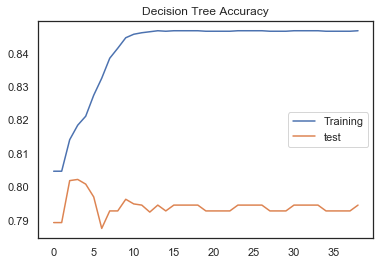

In [191]:
training_scores = []
test_scores = []

y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

for i in range(1,40):
    # Instantiate & fit the DT
    DT_model = DecisionTreeClassifier(max_depth=i, max_leaf_nodes=100)
    DT_model.fit(X_train, y_train)
    
    training_scores.append(DT_model.score(X_train, y_train))
    test_scores.append(DT_model.score(X_test, y_test))

plt.figure()
plt.title('Decision Tree Accuracy')
plt.plot(training_scores)
plt.plot(test_scores)
plt.legend(['Training', 'test'])

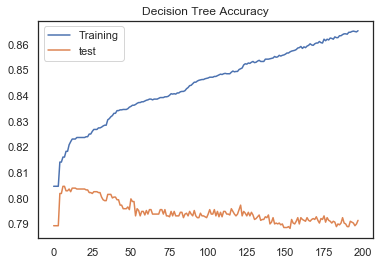

In [192]:
training_scores = []
test_scores = []

for i in range(2,200):
    # Instantiate & fit the DT
    DT_model = DecisionTreeClassifier(max_depth=19, max_leaf_nodes=i)
    DT_model.fit(X_train, y_train)
    
    training_scores.append(DT_model.score(X_train, y_train))
    test_scores.append(DT_model.score(X_test, y_test))

plt.figure()
plt.title('Decision Tree Accuracy')
plt.plot(training_scores)
plt.plot(test_scores)
plt.legend(['Training', 'test'])

In [193]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes=14)
DT_model.fit(X_train, y_train) 

##### DT RESULTS

In [197]:
# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")
print(f"DT test set accuracy: {DT_model.score(X_test, y_test)}")

DT training set accuracy: 0.8183041722745625
DT test set accuracy: 0.802929891873038


- Now that we have an optimized Decision Tree, let's see a grid search can conclude our results.

In [198]:
# Define hyperparameters to search over
dt_params = { 'max_depth':list(range(1,11)), 
              'min_samples_leaf': list(range(1,11)),
              'max_leaf_nodes': list(range(1,20))}

In [199]:
# Initiate the DT grid search
gs_dtmodel = GridSearchCV(estimator=DecisionTreeClassifier(random_state = 1), \
                          param_grid=dt_params, cv=5, n_jobs=-1, verbose=0)

# Fit the DT grid search
gs_dtmodel_fitted = gs_dtmodel.fit(X_test, y_test)

exception calling callback for <Future at 0x1a2b248190 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/joblib/_paralle

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [200]:
# Show the best estimators
gs_dtmodel_fitted.best_params_

NameError: name 'gs_dtmodel_fitted' is not defined

In [201]:
# Let's see if our accuracy improved
print(gs_dtmodel_fitted.score(X_test, y_test))
print(gs_dtmodel_fitted.score(X_train, y_train))

NameError: name 'gs_dtmodel_fitted' is not defined

In [202]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes=16, min_samples_leaf=1)
DT_model.fit(X_train, y_train) 

# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")
print(f"DT test set accuracy: {DT_model.score(X_test, y_test)}")

DT training set accuracy: 0.8230895767907881
DT test set accuracy: 0.8039762818276944


#### D. Random Forest Classifier

In [325]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

# Let's check our accuracy
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9810106716886378
0.780380673499268


In [326]:
accuracy_score(y_test, rfc_pred)

0.780380673499268

In [327]:
f1_score(y_test, rfc_pred)

0.7781065088757396

In [328]:
recall_score(y_test, rfc_pred)

0.7508922198429693

- Lets see if we can optimize a few hyper parameters

In [329]:
# Define hyperparameters to search over
rfc_params = { 'n_estimators':list(range(1,11)), 
               'min_samples_split': list(range(1,11)),
               'min_samples_leaf':list(range(1,11)),
               'max_leaf_nodes':list(range(1,11)) }

In [330]:
# Initiate the DT grid search
rfc2 = GridSearchCV(estimator=RandomForestClassifier(random_state = 1), \
                          param_grid=rfc_params, cv=5, n_jobs=-1, verbose=0)

# Fit the DT grid search
gs_rfcmodel_fitted = rfc2.fit(X_remainder, y_remainder)

In [331]:
# Show the best estimators
gs_rfcmodel_fitted.best_params_

{'max_leaf_nodes': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 10}

##### RFC RESULTS

In [332]:
# Let's see if our accuracy improved
print(gs_rfcmodel_fitted.score(X_remainder, y_remainder))
print(gs_rfcmodel_fitted.score(X_test, y_test))

0.8184813950295208
0.8155197657393851


In [333]:
# predict on test set
rfc_pred = rfc2.predict(X_test)

In [334]:
# predict on test set
rfc_pred = rfc2.predict(X_test)

In [335]:
accuracy_score(y_test, rfc_pred)

0.8155197657393851

In [336]:
f1_score(y_test, rfc_pred)

0.8123603871928518

In [337]:
recall_score(y_test, rfc_pred)

0.7787294789436117

In [338]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, rfc_pred)

In [339]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, rfc_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1331
           1       0.85      0.78      0.81      1401

    accuracy                           0.82      2732
   macro avg       0.82      0.82      0.82      2732
weighted avg       0.82      0.82      0.82      2732



In [340]:
pd.DataFrame(data=confusion_matrix,
            index = ["Predicted non-Falsified", "Predicted Falsified"],
            columns = ["True Non-Falsified", "True Falsified"])

,True Non-Falsified,True Falsified
Predicted non-Falsified,1137,194
Predicted Falsified,310,1091


In [160]:
for idx, prediction, label in zip(enumerate(X_test), rfc_pred, y_test):
    if prediction != label:
        print("Sample", idx, ', has been classified as', prediction, 'and should be', label) 

TypeError: zip argument #3 must support iteration

In [126]:
# with the following sentence you can get a mask of the items bad classified
mask = np.logical_not(np.equal(y_test, rfc_pred))
# Now you can use the mask to see the elements bad classified:
print(f"Elements wrongly classified: {X_test[mask]}")
print(f"Prediction by the model for each of those elements: {rfc_pred[mask]}")
print(f"Actual value for each of those elements: {np.asarray(y_test)[mask]}")

Elements wrongly classified:        verified_purchase  sentiment  num_punctuations  flesch_kincaid_grade  \
15704                  1          0                 7                 41.50   
6597                   1          1                 6                  9.10   
20121                  1          1                20                 59.40   
18413                  1          1                 2                  6.00   
1169                   1          0                 4                  2.90   
...                  ...        ...               ...                   ...   
15900                  1          1                 9                  4.40   
1412                   1          0                14                  4.70   
13796                  1          0                 5                 12.20   
8804                   1          1                 0                  8.30   
11958                  1          1                 2                 11.10   

       overall_readabi

IndexError: too many indices for array

In [ ]:
pd.set_option('display.max_colwidth', None)
# Looks good! Let's reset the setting
# pd.set_option('display.max_colwidth', 70)

In [156]:
df_final.query('flesch_kincaid_grade == 59.4 and num_punctuations == 20 and overall_readability_index == 0.00')[:1][:]

,doc_id,falsified,rating,verified_purchase,product_category,product_id,product_title,review_title,review_text_x,sentiment,...,mean_word_len,num_chars,num_punctuations,num_scentences_in_text,flesch_ease,flesch_kincaid_grade,automated_readability_index,overall_readability_index,total_sentiment,average_review_sentiment
20121,20287,0,5,1,Wireless,B00HQ2GYT6,"Stylus, amPen Hybrid 3-in-1 Stylus for iPad/2/3/4, iPad Air, iPad Mini 2/4, iPhone, Galaxy Phone, Galaxy Tab, and any Touchscreen Smartphone or Tablet - (Tips are Replaceable) Silver",Great Stylus! Highly recommended.,"This is a great stylus. It moves smoothly and my iPad is very responsive to it. There is no comparison between this and a rubber tipped stylus. In addition, the larger stylus tip is replaceable. The pen writes smoothly as well.My only complaint is that the clip broke off right away. It is much too tight. Don't plan on clipping this stylus to anything... not even your shirt pocket. This complaint is completely overshadowed by the impressive functionality of the stylus so I still give it 5 stars.Updated: TechMatte sent an email asking me for feedback on their product and services. I mentioned the issue with the clip breaking. They said the problem had been fixed on a updated model of the stylus. They promptly sent me replacement styli free. The replacements have no issues with the clips and otherwise are just as good as the originals.",1,...,4.75,856,20,1,-69.28,59.40,74.40,0.00,35.00,35.00


### 9. Model Compairsion

Model | Training Accuracy | Test Accuracy | Tuned? |
------------- | ------------- | ------------- | ------------- |
Logistic Regression | 81.5% | 80.2% | Y
KNN | 67.9% | 72.5% | Y |
SVM | 81.2% | 79.7% | N |
<mark><b>Random Forest Classifier <b><mark> | 81.6% | 80.3% | Y |
    
Finally, when we dive deeper into the other metrics:

Model| Accuracy | Precision | Recall | F1-score | 
------------- | ------------- | ------------- | ------------- | ------------- |
<mark><b>Logistic Regression<b><mark> | 81.0%  |    81.0%   |   81.0%| 81.0% |
KNN | 72.0%   |   73.0%   |   72.0%| 72.0%|
SVM | 80.0%   |   80.0%    |  80.0% | 80.0% |
Random Forest Classifier | 80.0%    |  81.0%  |    80.0% | 80.0%



### 10. Random Forest Model Tuning and Selection

In [178]:
#from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [209]:
# y = df_downsampled['falsified']
# X = df_downsampled.drop(columns='falsified')

y = df_numerical['falsified']
X = df_numerical.drop(columns='falsified')

X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=1)

In [210]:
my_pipeline = Pipeline([('scalar', StandardScaler()), ('dim_reducer', PCA()), ('model', RandomForestClassifier)])

In [211]:
# Parameter grid 
dt_params2 = [
    
    #without PCA 
    {'scalar': [None], 
    'dim_reducer' : [None],
    'model' : [RandomForestClassifier(random_state = 1)], 
    'model__max_depth' : list(range(1,11))},
               
    #with PCA 
    {'scalar' : [StandardScaler(), MinMaxScaler()],
    'dim_reducer' : [PCA()],
    'dim_reducer__n_components' : [.95,0.90,.85,0.8],
    'model' : [RandomForestClassifier(random_state=1)],
    'model__max_depth' : list(range(1,11))}
]

In [212]:
gs_dtmodel2 = GridSearchCV(my_pipeline, param_grid = dt_params2, cv = 5)

In [213]:
gs_dtmodels2_fitted = gs_dtmodel2.fit(X_remainder, y_remainder)

In [214]:
gs_dtmodels2_fitted.best_params_

{'dim_reducer': None,
 'model': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=10, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=1, verbose=0,
                        warm_start=False),
 'model__max_depth': 10,
 'scalar': None}

In [215]:
print(gs_dtmodels2_fitted.score( X_remainder, y_remainder))
print(gs_dtmodels2_fitted.score( X_test, y_test))

0.8362938070091215
0.7956473035685709
